### SIMILARITY AMONG TEXTUAL DATA

#### 1: Make up your own set of word features describing 6 different entities; with some obvious overlaps and differences.
    a. Modify the Jaccard-Index python program to do Jaccard-Distance and then compute all pairwise
distances between the entities. Based on results, show empirically, that the property of triangle inequality
holds for measure.

    b. Now implement the difference function for the Dice Coefficient and show that the property of triangle
inequality may not hold for this measure.

In [1]:
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords 
import re
import pandas as pd
from nltk import pos_tag

tweet_dict = {'target1': 'He was carrying his rolled up silk pajamas and a toothbrush',
              'target2': 'At midnight he came home, changed into his silk pajamas and crawled into bed.',
              'target3': 'She wore silk pajamas and a woolen sweater and carried a toothbrush.',
              'target4': 'It was comfortable, like wearing silk pajamas all day long.',
              'target5': 'A woman in silk green pajamas took my arm and I was led to a toothbrush shop.',
              'target6': 'He was wearing his silk pajamas and carried toothbrush.'
             }
tweet_tk = TweetTokenizer() 
swords = stopwords.words('english')
tweets = []
pos_tagged = []

for k in tweet_dict:
    tokenised_tweet = tweet_tk.tokenize(tweet_dict[k])
    lower_tweet = [i.lower() for i in tokenised_tweet]
    for l in range(len(lower_tweet)):
        lower_tweet[l]= re.sub(r'[\d]', ' ', lower_tweet[l])
        lower_tweet[l]= re.sub(r'[^\w_]', '',lower_tweet[l])
    tweets.append([w for w in lower_tweet if w not in swords])            

final_tweets = []
for tweet in tweets:
    tweet_cleaned = [a for a in tweet if a]
    final_tweets.append(tweet_cleaned)
    
for tweet in final_tweets:
    pos_tagged.append(pos_tag(tweet))

def convert_tags(tag):
    if tag == 'VBZ' or tag == 'VBN'or tag == 'VBD'or tag == 'VB'or tag == 'VBG'or tag == 'VBP':
        return 'v'
    elif tag == 'NN' or tag == 'NNP' or tag == 'NNS':
        return 'n'
    #elif tag == 'RB' or tag == 'RBR' or tag == 'RBS':
     #   return 'p'
    elif tag.startswith('j') or tag.startswith('J') :
        return 'a'
    elif tag.startswith('r') or tag.startswith('R'):
        return 'r'
    else:
        return 'n'
lemm_out = []
from nltk import WordNetLemmatizer
wnl = WordNetLemmatizer()

fully_out = []
for l in pos_tagged:
    i_m_in = []
    for ele in l:
        new_tag = convert_tags(ele[1])
        i_m_in.append(wnl.lemmatize(ele[0],new_tag))
    fully_out.append(i_m_in)

final_output = []
for ele in fully_out:
    string_join = ' '.join(ele)
    final_output.append(string_join)
print(final_output)

['carry roll silk pajama toothbrush', 'midnight come home change silk pajama crawl bed', 'wore silk pajama woolen sweater carry toothbrush', 'comfortable like wear silk pajama day long', 'woman silk green pajama take arm lead toothbrush shop', 'wear silk pajama carry toothbrush']


In [2]:
target1 = 'carry roll silk pajama toothbrush'
target2 = 'midnight come home change silk pajama crawl bed'
target3 = 'wore silk pajama woolen sweater carry toothbrush'
target4 = 'comfortable like wear silk pajama day long'
target5 = 'woman silk green pajama take arm lead toothbrush shop'
target6 = 'wear silk pajama carry toothbrush'

In [3]:
def JaccardIndex(str1,str2):
    set1 = set(str1.split())
    set2 = set(str2.split())
    ans = float(len(set1 & set2 )/len(set1 | set2))
    return round((1-ans),2)

In [4]:
t1_2 = JaccardIndex(target1,target2)
t1_3 = JaccardIndex(target1,target3)
t1_4 = JaccardIndex(target1,target4)
t1_5 = JaccardIndex(target1,target5)
t1_6 = JaccardIndex(target1,target6)
t2_3 = JaccardIndex(target2,target3)
t2_4 = JaccardIndex(target2,target4)
t2_5 = JaccardIndex(target2,target5)
t2_6 = JaccardIndex(target2,target6)
t3_4 = JaccardIndex(target3,target4)
t3_5 = JaccardIndex(target3,target5)
t3_6 = JaccardIndex(target3,target6)
t4_5 = JaccardIndex(target4,target5)
t4_6 = JaccardIndex(target4,target6)
t5_6 = JaccardIndex(target5,target6)
Jacc_list = [t1_2,t1_3,t1_4,t1_5,t1_6,t2_3,t2_4,t2_5,t2_6,t3_4,t3_5,t3_6,t4_5,t4_6,t5_6]
Jacc_list_Names = ['t1_2','t1_3','t1_4','t1_5','t1_6','t2_3','t2_4','t2_5','t2_6','t3_4','t3_5','t3_6','t4_5','t4_6','t5_6']
print (Jacc_list)

[0.82, 0.5, 0.8, 0.73, 0.33, 0.85, 0.85, 0.87, 0.82, 0.83, 0.77, 0.5, 0.86, 0.67, 0.73]


In [5]:
JaccDframe =pd.DataFrame(Jacc_list,index = Jacc_list_Names,columns = ['Jaccard_Score'])
JaccDframe

,Jaccard_Score
t1_2,0.82
t1_3,0.50
t1_4,0.80
t1_5,0.73
t1_6,0.33
t2_3,0.85
t2_4,0.85
t2_5,0.87
t2_6,0.82
t3_4,0.83


###  Property of Triangle Inequality

In [6]:
t1_4 <= t1_2 + t2_4

True

In [7]:
t1_5 <= t1_3 + t3_5

True

### Dice Coefficient

In [8]:
def DiceCoefficient(str1,str2):
    set1 = set(str1.split())
    set2 = set(str2.split())
    ans = float(2* len(set1 & set2 )/len(set1 | set2))
    return round((1-ans),2)

In [9]:
t1_2_dcoeff = DiceCoefficient(target1,target2)
t1_3_dcoeff = DiceCoefficient(target1,target3)
t1_4_dcoeff = DiceCoefficient(target1,target4)
t1_5_dcoeff = DiceCoefficient(target1,target5)
t1_6_dcoeff = DiceCoefficient(target1,target6)
t2_3_dcoeff = DiceCoefficient(target2,target3)
t2_4_dcoeff = DiceCoefficient(target2,target4)
t2_5_dcoeff = DiceCoefficient(target2,target5)
t2_6_dcoeff = DiceCoefficient(target2,target6)
t3_4_dcoeff = DiceCoefficient(target3,target4)
t3_5_dcoeff = DiceCoefficient(target3,target5)
t3_6_dcoeff = DiceCoefficient(target3,target6)
t4_5_dcoeff = DiceCoefficient(target4,target5)
t4_6_dcoeff = DiceCoefficient(target4,target6)
t5_6_dcoeff = DiceCoefficient(target5,target6)

Dice_list = [t1_2_dcoeff,t1_3_dcoeff,t1_4_dcoeff,t1_5_dcoeff,t1_6_dcoeff,t2_3_dcoeff,t2_4_dcoeff,t2_5_dcoeff,t2_6_dcoeff,t3_4_dcoeff,t3_5_dcoeff,t3_6_dcoeff,t4_5_dcoeff,t4_6_dcoeff,t5_6_dcoeff]
Dice_list_Names = ['t1_2','t1_3','t1_4','t1_5','t1_6','t2_3','t2_4','t2_5','t2_6','t3_4','t3_5','t3_6','t4_5','t4_6','t5_6']
print (Dice_list)

[0.64, 0.0, 0.6, 0.45, -0.33, 0.69, 0.69, 0.73, 0.64, 0.67, 0.54, 0.0, 0.71, 0.33, 0.45]


In [10]:
DiceDframe =pd.DataFrame(Dice_list,index = Dice_list_Names,columns = ['Dice_Score'])
DiceDframe

,Dice_Score
t1_2,0.64
t1_3,0.00
t1_4,0.60
t1_5,0.45
t1_6,-0.33
t2_3,0.69
t2_4,0.69
t2_5,0.73
t2_6,0.64
t3_4,0.67


### Property of Triangle Inequality


In [11]:
t3_5_dcoeff <= t3_4_dcoeff + t4_5_dcoeff

True

In [12]:
t1_3_dcoeff <= t1_6_dcoeff + t3_6_dcoeff

False

## 2
    a. Find 3 short documents about which you might want to know their similarity. Produce 5 variants on one
of the documents and see how the cosine similarity changes.
    
    b. Plot the similarity differences on a graph showing their cosine similarity score. Verify that your intuitions
about what makes the differing docs less similar does indeed lead to scores that are less similar.

### 3 Documents:
1. Give up this habit of interrupting others.
2. She was forming a habit of interrupting from feelings.
3. Habit is habit, and not to be poking out of the window by any man, but coaxed downstairs a step a time.

In [32]:
import re, math
from collections import Counter
vector_dict = {}

def load_docs():
    print ('.........Loading docs.....')
    doc1 = ('d1','Give up this habit of interrupting other')
    doc2 = ('d2','She was forming a habit of interrupting from feelings.')
    doc3 = ('d3','Habit is habit, and not to be poking out of the window by any man, but coaxed downstairs a step a time.')
    return [doc1,doc2,doc3]

def process_docs(all_dcs):
    stop_words = ['of','and','on','in','up','this','we','How']
    all_words = []
    counts_dict = {}
    for doc in all_dcs:
        words = [x.lower() for x in doc[1].split() if x not in stop_words]
        words_counted = Counter(words)
        unique_words =list(words_counted.keys())
        counts_dict[doc[0]] = words_counted
        all_words = all_words + unique_words
    n = len(counts_dict)
    df_count = Counter(all_words)
    compute_vector_len(counts_dict, n, df_count)
    

def compute_vector_len(doc_dict,no, df_counts):
    global vector_dict
    for doc_name in doc_dict:
        doc_words = doc_dict[doc_name].keys()
        wd_tfidf_scores = {}
        for wd in list(set(doc_words)):
            wds_cts = doc_dict[doc_name]
            wd_tf_idf = wds_cts[wd] * math.log(no / df_counts[wd], 10)
            wd_tfidf_scores[wd] = round(wd_tf_idf, 4)
        vector_dict[doc_name] =wd_tfidf_scores
    #print(vector_dict)
        
def get_cosine(text1,text2):
    vec1 = vector_dict[text1]
    vec2 = vector_dict[text2]
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])
    sum1 = sum([vec1[x] ** 2 for x in vec1.keys()])
    sum2 = sum([vec2[x] ** 2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)
    if not denominator:
        return 0.0
    else:
        return round(float(numerator/ denominator), 3)

all_docs = load_docs()
process_docs(all_docs)

for keys,value in vector_dict.items():
    print(keys,value)
cos_list = []
text1 = 'd1'
text2 = 'd2'
text3 = 'd3'

cosine = get_cosine(text1,text2)
cos_list.append(cosine)
cos_list.append(get_cosine(text1,text3))
cos_list.append(get_cosine(text3,text2))

#print('Cosine: ', cos_list)
index_list = ['Text1-Text2', 'Text2-Text3','Text3-Text1']
Cos_Sim_3 = pd.DataFrame(cos_list,index = index_list,columns =  ['Cosine Similarity Score'])
print('\n\n',Cos_Sim_3)

.........Loading docs.....
d1 {'other': 0.4771, 'interrupting': 0.1761, 'give': 0.4771, 'habit': 0.0}
d2 {'forming': 0.4771, 'feelings.': 0.4771, 'from': 0.4771, 'a': 0.1761, 'interrupting': 0.1761, 'was': 0.4771, 'habit': 0.0, 'she': 0.4771}
d3 {'be': 0.4771, 'is': 0.4771, 'habit,': 0.4771, 'poking': 0.4771, 'out': 0.4771, 'window': 0.4771, 'man,': 0.4771, 'time.': 0.4771, 'but': 0.4771, 'coaxed': 0.4771, 'the': 0.4771, 'downstairs': 0.4771, 'any': 0.4771, 'not': 0.4771, 'to': 0.4771, 'a': 0.3522, 'habit': 0.0, 'step': 0.4771, 'by': 0.4771}


              Cosine Similarity Score
Text1-Text2                    0.041
Text2-Text3                    0.000
Text3-Text1                    0.028


### Variant of Text1:
#### 1. Give away your habit of poking others
#### 2. Throw your habit of interfering among other people.
#### 3. Give up this habit of intervening wine with others.
#### 4. Give up this habit of intruding and interrupting others.
#### 5. He has given the habit of interrupting others.

In [33]:
import re, math
from collections import Counter
vector_dict = {}

def load_docs():
    #print ('.........Loading docs.....')
    doc1 = ('d1','Give up this habit of interrupting other')
    doc2 = ('d2', 'Habit dies hard.')
    doc3 = ('d3', 'How easily we acquire bad habits dies')
    doc1_1 = ('t1','Give away your habit of poking others')
    doc1_2 = ('t2',' Throw your habit of interfering among other people.')
    doc1_3 = ('t3','Give up this habit of intervening wine')
    doc1_4 = ('t4','Give up this habit of intruding and interrupting others')
    doc1_5 = ('t5','He has given the habit of interrupting others')
    return [doc1,doc2,doc3,doc1_1,doc1_2,doc1_3,doc1_4, doc1_5]

def process_docs(all_dcs):
    stop_words = ['of','and','on','in','up','this','we','How']
    all_words = []
    counts_dict = {}
    for doc in all_dcs:
        words = [x.lower() for x in doc[1].split() if x not in stop_words]
        words_counted = Counter(words)
        unique_words =list(words_counted.keys())
        counts_dict[doc[0]] = words_counted
        all_words = all_words + unique_words
    n = len(counts_dict)
    df_count = Counter(all_words)
    compute_vector_len(counts_dict, n, df_count)
    

def compute_vector_len(doc_dict,no, df_counts):
    global vector_dict
    for doc_name in doc_dict:
        doc_words = doc_dict[doc_name].keys()
        wd_tfidf_scores = {}
        for wd in list(set(doc_words)):
            wds_cts = doc_dict[doc_name]
            wd_tf_idf = wds_cts[wd] * math.log(no / df_counts[wd], 10)
            wd_tfidf_scores[wd] = round(wd_tf_idf, 4)
        vector_dict[doc_name] =wd_tfidf_scores
    #print(vector_dict)
        
def get_cosine(text1,text2):
    vec1 = vector_dict[text1]
    vec2 = vector_dict[text2]
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])
    sum1 = sum([vec1[x] ** 2 for x in vec1.keys()])
    sum2 = sum([vec2[x] ** 2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)
    if not denominator:
        return 0.0
    else:
        return round(float(numerator/ denominator), 3)

all_docs = load_docs()
process_docs(all_docs)

#for keys,value in vector_dict.items():
 #   print(keys,value)
#cos_list = []
text1 = 'd1'
text2 = 'd2'
text3 = 'd3'
t1 = 't1'
t2 = 't2'
t3 = 't3'
t4 = 't4'
t5 = 't5'
cos_list_new = []

cos_list_new.append(get_cosine(text1, text2))
cos_list_new.append(get_cosine(text1, text3))
cos_list_new.append(get_cosine(text1, t1))
cos_list_new.append(get_cosine(text1, t2))
cos_list_new.append(get_cosine(text1, t3))
cos_list_new.append(get_cosine(text1, t4))
cos_list_new.append(get_cosine(text1, t5))
cos_list_new.append(get_cosine(text2, text3))
cos_list_new.append(get_cosine(text2, t1))
cos_list_new.append(get_cosine(text2, t2))
cos_list_new.append(get_cosine(text2, t3))
cos_list_new.append(get_cosine(text2, t4))
cos_list_new.append(get_cosine(text2, t5))
cos_list_new.append(get_cosine(text3, t1))
cos_list_new.append(get_cosine(text3, t2))
cos_list_new.append(get_cosine(text3, t3))
cos_list_new.append(get_cosine(text3, t4))
cos_list_new.append(get_cosine(text3, t5))
cos_list_new.append(get_cosine(t1, t2))
cos_list_new.append(get_cosine(t1, t3))
cos_list_new.append(get_cosine(t1, t4))
cos_list_new.append(get_cosine(t1, t5))
cos_list_new.append(get_cosine(t2, t3))
cos_list_new.append(get_cosine(t2, t4))
cos_list_new.append(get_cosine(t2, t5))
cos_list_new.append(get_cosine(t3, t4))
cos_list_new.append(get_cosine(t3, t5))
cos_list_new.append(get_cosine(t4, t5))
#print('\n\nCosine: ', cos_list_new)
l = ['text1, text2','text1, text3','text1, t1','text1, t2','text1, t3','text1, t4','text1, t5','text2, text3','text2, t1','text2, t2','text2, t3','text2, t4','text2, t5','text3, t1','text3, t2','text3, t3','text3, t4','text3, t5','t1, t2','t1, t3','t1, t4','t1, t5','t2, t3','t2, t4','t2, t5','t3, t4','t3, t5','t4, t5']
Cos_Sim_8 = pd.DataFrame(cos_list_new, index = l, columns = ['Cosine Similarity Score'])
print(Cos_Sim_8)

cos_list_Text1= []
cos_list_Text1.append(get_cosine(text1, text2))
cos_list_Text1.append(get_cosine(text1, text3))
cos_list_Text1.append(get_cosine(text1, t1))
cos_list_Text1.append(get_cosine(text1, t2))
cos_list_Text1.append(get_cosine(text1, t3))
cos_list_Text1.append(get_cosine(text1, t4))
cos_list_Text1.append(get_cosine(text1, t5))

m = ['text1, text2','text1, text3','text1, t1','text1, t2','text1, t3','text1, t4','text1, t5']
Cos_Sim1_with_others = pd.DataFrame(cos_list_Text1, index = m, columns = ['Cosine Similarity Score'])
print('\n\n',Cos_Sim1_with_others)
#print('\n\nCosine list wrt Text1: ', cos_list_Text1)


              Cosine Similarity Score
text1, text2                    0.004
text1, text3                    0.000
text1, t1                       0.078
text1, t2                       0.229
text1, t3                       0.090
text1, t4                       0.306
text1, t5                       0.121
text2, text3                    0.175
text2, t1                       0.002
text2, t2                       0.002
text2, t3                       0.002
text2, t4                       0.003
text2, t5                       0.002
text3, t1                       0.000
text3, t2                       0.000
text3, t3                       0.000
text3, t4                       0.000
text3, t5                       0.000
t1, t2                          0.122
t1, t3                          0.047
t1, t4                          0.162
t1, t5                          0.064
t2, t3                          0.001
t2, t4                          0.001
t2, t5                          0.001
t3, t4      

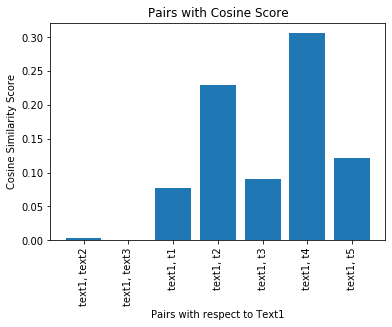

In [34]:
import matplotlib.pyplot as plt
xlbl=['text1, text2','text1, text3','text1, t1','text1, t2','text1, t3','text1, t4','text1, t5']
#xlbl = ['text1, t1', 'text1, t2','text1, t3','text1, t4','text1, t5','text1, text2', 'text1, text3']
#cos_list_new = [0.055, 0.002, 0.068, 0.234, 0.099]
#print(len(xlbl))
#print (len(cos_list_new))

plt.bar(xlbl,height= cos_list_Text1, width = 0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Pairs with respect to Text1')
plt.ylabel('Cosine Similarity Score')
plt.title('Pairs with Cosine Score')
plt.show()

### 2c Find a python package that computes cosine similarity and euclidean distance. Use it process the data
you have already. Do the answers for Cosine Similarity correspond? What do the Euclidean Distance scores
look like relative to the Cosine ones?
Package: from sklearn.metrics.pairwise import cosine_similarity

d1 = 'Give up this habit of interrupting other'
d2 = 'Habit dies hard.'
d3 = 'How easily we acquire bad habits dies'
t1 = 'Give away your habit of poking others'
t2 = 'He is in habit of interfering'
t3 = 'Give up this habit of intervening wine'
t4 = 'Give up this habit of intruding and interrupting others'
t5 = 'He has given the habit of interrupting others'
documents = [d1,d2,d3,t1,t2,t3,t4,t5]

In [35]:
test = {
 'd1': {'interrupting': 0.426, 'habit': 0.058, 'give': 0.301, 'other': 0.9031}, 
 'd2': {'habit': 0.058, 'hard.': 0.9031, 'dies': 0.6021}, 
 'd3': {'dies': 0.6021, 'easily': 0.9031, 'acquire': 0.9031, 'habits': 0.9031, 'bad': 0.9031}, 
 't1': {'give': 0.301, 'away': 0.9031, 'habit': 0.058, 'poking': 0.9031, 'your': 0.9031, 'others': 0.426}, 
 't2': {'habit': 0.058, 'is': 0.9031, 'he': 0.6021, 'interfering': 0.9031}, 
 't3': {'habit': 0.058, 'give': 0.301, 'wine': 0.9031, 'intervening': 0.9031}, 
 't4': {'interrupting': 0.426, 'give': 0.301, 'intruding': 0.9031, 'habit': 0.058, 'others': 0.426}, 
 't5': {'interrupting': 0.426, 'habit': 0.058, 'the': 0.9031, 'others': 0.426, 'has': 0.9031, 'he': 0.6021, 'given': 0.9031}
}

f = []
for k in test:
    f.append(' '.join(test[k].keys()))
f

['interrupting habit give other',
 'habit hard. dies',
 'dies easily acquire habits bad',
 'give away habit poking your others',
 'habit is he interfering',
 'habit give wine intervening',
 'interrupting give intruding habit others',
 'interrupting habit the others has he given']

In [36]:
# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(f)

# OPTIONAL: Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
print(doc_term_matrix)
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=['d1', 'd2', 'd3','t1','t2','t3','t4','t5',])
df

[[0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1]
 [0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0]]


,acquire,away,bad,dies,easily,give,given,habit,habits,hard,...,interrupting,intervening,intruding,is,other,others,poking,the,wine,your
d1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
d2,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
d3,1,0,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
t1,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,1,0,0,1
t2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
t3,0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
t4,0,0,0,0,0,1,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0
t5,0,0,0,0,0,0,1,1,0,0,...,1,0,0,0,0,1,0,1,0,0


In [37]:
from sklearn.metrics.pairwise import cosine_similarity
cos_list_lib = cosine_similarity(doc_term_matrix)

In [38]:
cos_list_lib

array([[1.        , 0.28867513, 0.        , 0.40824829, 0.25      ,
        0.5       , 0.67082039, 0.37796447],
       [0.28867513, 1.        , 0.25819889, 0.23570226, 0.28867513,
        0.28867513, 0.25819889, 0.21821789],
       [0.        , 0.25819889, 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.40824829, 0.23570226, 0.        , 1.        , 0.20412415,
        0.40824829, 0.54772256, 0.3086067 ],
       [0.25      , 0.28867513, 0.        , 0.20412415, 1.        ,
        0.25      , 0.2236068 , 0.37796447],
       [0.5       , 0.28867513, 0.        , 0.40824829, 0.25      ,
        1.        , 0.4472136 , 0.18898224],
       [0.67082039, 0.25819889, 0.        , 0.54772256, 0.2236068 ,
        0.4472136 , 1.        , 0.50709255],
       [0.37796447, 0.21821789, 0.        , 0.3086067 , 0.37796447,
        0.18898224, 0.50709255, 1.        ]])

In [39]:
print(cos_list_lib[0])

[1.         0.28867513 0.         0.40824829 0.25       0.5
 0.67082039 0.37796447]


[0.2886751345948129, 0.0, 0.4082482904638631, 0.25, 0.5, 0.6708203932499369, 0.3779644730092272]
7
7


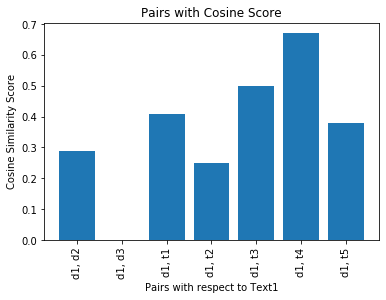

In [40]:
xlbl = ['d1, d2', 'd1, d3','d1, t1','d1, t2','d1, t3','d1, t4', 'd1, t5']
lst = list(cos_list_lib[0])
#print(lst)
lst.pop(0)
print(lst)
print(len(xlbl))
print(len(lst))


plt.bar(xlbl,height= lst, width = 0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Pairs with respect to Text1')
plt.ylabel('Cosine Similarity Score')
plt.title('Pairs with Cosine Score')
#plt.text('K')
#plt.figure(figsize=(18,9))
plt.show()

In [41]:
from sklearn.metrics.pairwise import euclidean_distances

In [42]:
euc_list = euclidean_distances(doc_term_matrix)
euc_list

array([[0.        , 2.23606798, 3.        , 2.44948974, 2.44948974,
        2.        , 1.73205081, 2.64575131],
       [2.23606798, 0.        , 2.44948974, 2.64575131, 2.23606798,
        2.23606798, 2.44948974, 2.82842712],
       [3.        , 2.44948974, 0.        , 3.31662479, 3.        ,
        3.        , 3.16227766, 3.46410162],
       [2.44948974, 2.64575131, 3.31662479, 0.        , 2.82842712,
        2.44948974, 2.23606798, 3.        ],
       [2.44948974, 2.23606798, 3.        , 2.82842712, 0.        ,
        2.44948974, 2.64575131, 2.64575131],
       [2.        , 2.23606798, 3.        , 2.44948974, 2.44948974,
        0.        , 2.23606798, 3.        ],
       [1.73205081, 2.44948974, 3.16227766, 2.23606798, 2.64575131,
        2.23606798, 0.        , 2.44948974],
       [2.64575131, 2.82842712, 3.46410162, 3.        , 2.64575131,
        3.        , 2.44948974, 0.        ]])

[0.0, 2.23606797749979, 3.0, 2.449489742783178, 2.449489742783178, 2.0, 1.7320508075688772, 2.6457513110645907]
7
7


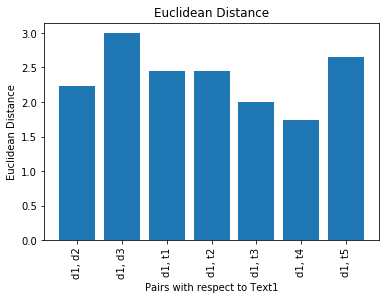

In [43]:
xlbl = ['d1, d2', 'd1, d3','d1, t1','d1, t2','d1, t3','d1, t4', 'd1, t5']
lst = list(euc_list[0])
print(lst)
lst.pop(0)
print(len(xlbl))
print(len(lst))


plt.bar(xlbl,height= lst, width = 0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Pairs with respect to Text1')
plt.ylabel('Euclidean Distance')
plt.title('Euclidean Distance')
#plt.text('K')
#plt.figure(figsize=(18,9))
plt.show()

#### 3 Create or find 5 “normal” tweets from Twitter. Now take one of these tweets and systematically generate 20 SPAM tweets from it; using the typical techniques of spammers. Now, perform comparisons between these 20 SPAM tweets each of the 5 Normal Tweets. Plot their edit-distance scores in a graph and colour code to show how the SPAM v Normal ones. Are the SPAM tweets obvious, if not why?

Tweets: 
1. 
@awscloud
When #reInvent reserved seating opens on Oct 15 at 10am PT, you'll be able to save yourself a spot in the sessions you want to attend. Pro tip: start favoriting sessions in the catalog now & add plenty of options just in case you need backups. amzn.to/2LThwFi

2. 
#ISRO
See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload. IIRS is designed to measure reflected sunlight from the lunar surface in narrow and contiguous spectral channels. For details visit:bit.ly/2MTosBw

3. 
Brexiters:“Vote for this deal and leave the EU!” Also Brexiters: “Northern Ireland have a ‘cracking deal’ because they get to stay in the EU.” #VoteDownTheDeal #PeoplesVoteMarch

4. 
England is getting what it voted for, Wales is getting what it voted for and Northern Ireland is getting a special deal - 
Yet Scotland that democratically voted to remain - is being ignored - and treated as a second class nation by this Government. #BrexitDeal #SuperSaturday

5. 
#QuizTime Discover the adventure and fun of math puzzles and improve skills for entrance exams! Solve and comment your answers! 
#SaturdayQuiz #QuizKnock #Quizoftheday #Quiz #HDFCCredila

Spam Tweets: 
1.#ISRO See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload. IIRS is designed to measure reflected sunlight from the lunar surface in narrow and contiguous spectral channels. For details visit:bit.ly/2MTosBw

2.#ISRO #Chandrayaan2
See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload. IIRS is designed to measure reflected sunlight from the lunar surface in narrow and contiguous spectral channels.

3.#Chandrayaan2 #India
See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload. IIRS is designed to measure reflected sunlight from the lunar surface in narrow and contiguous spectral channels. For details visit:bit.ly/2MTosBw

4.#ISROBoom
See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload. IIRS is designed to measure reflected sunlight from the lunar surface in narrow and contiguous spectral channels.

5.#Vikramlander 
See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload. IIRS is designed to measure reflected sunlight from the lunar surface in narrow and contiguous spectral channels. For details visit:bit.ly/2MTosBw

6.#ISRO See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload. IIRS is designed to measure reflected sunlight from the lunar surface in narrow and contiguous spectral channels. For details visit:bit.ly/2lHe9GT

7.@SunflowerSue37 #ISRO See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload. IIRS is designed to measure reflected sunlight from the lunar surface in narrow and contiguous spectral channels. For details visit:bit.ly/2lHe9GT

8.@SunflowerSue37 #ISRO See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload. IIRS is designed to measure reflected sunlight from the lunar surface in narrow and contiguous spectral channels.

9.@rashtraptibhvn #ISRO #NewBeginnings See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload. IIRS is designed to measure reflected sunlight from the lunar surface in narrow and contiguous spectral channels.

10.#MoonLanding #isro See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload. IIRS is designed to measure reflected sunlight from the lunar surface in narrow and contiguous spectral channels. For details visit:bit.ly/2lHe9GT

11.Chaand ko toh roj dekha hai dur se Aaj @isro ne dikha diya use bhi kareeb se... #feelingproud #Chandrayaan2 #ISRO
See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload. IIRS is designed to measure reflected sunlight from the lunar surface in narrow and contiguous spectral channels. For details visit:bit.ly/2lHe9GT

12.See the first illuminated image of the lunar surface acquired by #Chandrayaan2 IIRS payload. 
East or West ISRO is the best ISRO is the real hero of India #Chandrayaan2 #ISRO

13.Keep marching #ISRO See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload.For details visit:bit.ly/2lHe9GT

14.@isro #Chandrayaan2 ISRO is real hero of India A Big Salute for Our Hardworking Scientists
See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload
#Chandrayaan2 is our Pride and Honour #ISRO 

15.Great Job #ISRO #We_all_Proud_of_you See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload

16.there is no science without experiment we will comeback #Chandrayaan2  #ISRO
See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload.For details visit:bit.ly/2lHe9GT

17.ISRO is real hero of India. A Big Salute for Our Hardworking Scientists
#Chandrayaan2 is our Pride and Honour #ISRO @isro #Chandrayaan2
See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload.

18.Always exciting to see the first results of something. Good job 
@isro #Chandrayaan2 #ISRO
See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload.For details visit:bit.ly/2lHe9GT

19.First illuminated image of the lunar surface beamed by #Chandrayaan2’s Imaging Infrared Spectrometer payload #ISRO

20.Instead of Hindu Muslim news, if such things gets posted daily, life will be easy #isro
See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload.For details visit:bit.ly/2lHe9GT

In [25]:
#NORMAL TWEETS PROCESSING 

from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords 
import re
import pandas as pd

tweet_dict = {'target1': '@awscloud When #reInvent reserved seating opens on Oct 15 at 10am PT, you will be able to save yourself a spot in the sessions you want to attend. Pro tip: start favoriting sessions in the catalog now & add plenty of options just in case you need backups. amzn.to/2LThwFi',
              'target2': '#ISRO See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload. IIRS is designed to measure reflected sunlight from the lunar surface in narrow and contiguous spectral channels. For details visit:bit.ly/2MTosBw',
              'target3': 'Brexiters:“Vote for this deal and leave the EU!” Also Brexiters: “Northern Ireland have a ‘cracking deal’ because they get to stay in the EU.” #VoteDownTheDeal #PeoplesVoteMarch',
              'target4': 'England is getting what it voted for, Wales is getting what it voted for and Northern Ireland is getting a special deal - Yet Scotland that democratically voted to remain - is being ignored - and treated as a second class nation by this Government. #BrexitDeal #SuperSaturday',
              'target5': '#QuizTime Discover the adventure and fun of math puzzles and improve skills for entrance exams! Solve and comment your answers! #SaturdayQuiz #QuizKnock #Quizoftheday #Quiz #HDFCCredila'
             }

tweet_tk = TweetTokenizer() 
swords = stopwords.words('english')
normal_tweets = []
#pos_tagged = []

# PRE PROCESSING FOR NORMAL TWEETS
for k in tweet_dict:
    tokenised_tweet = tweet_tk.tokenize(tweet_dict[k])
    lower_tweet = [i.lower() for i in tokenised_tweet]
    for l in range(len(lower_tweet)):
        lower_tweet[l]= re.sub(r'[\d]', '', lower_tweet[l])
        #lower_tweet[l]= re.sub(r'[^\w_]', '',lower_tweet[l])
    normal_tweets.append([w for w in lower_tweet if w not in swords])            

final_output = []
for ele in normal_tweets:
    string_join = ' '.join(ele)
    final_output.append(string_join)

normal_tweets = [word.replace(".", "").replace(",", "").replace("’","").replace("!","").replace("?","").replace(":", "").replace("-", "") for word in final_output]
print(normal_tweets)

['@awscloud #reinvent reserved seating opens oct  pt  able save spot sessions want attend  pro tip  start favoriting sessions catalog & add plenty options case need backups  amznto/lthwfi', '#isro see first illuminated image lunar surface acquired #chandrayaan  iirs payload  iirs designed measure reflected sunlight lunar surface narrow contiguous spectral channels  details visit  bitly/mtosbw', 'brexiters  “ vote deal leave eu  ” also brexiters  “ northern ireland ‘ cracking deal  get stay eu  ” #votedownthedeal #peoplesvotemarch', 'england getting voted  wales getting voted northern ireland getting special deal  yet scotland democratically voted remain  ignored  treated second class nation government  #brexitdeal #supersaturday', '#quiztime discover adventure fun math puzzles improve skills entrance exams  solve comment answers  #saturdayquiz #quizknock #quizoftheday #quiz #hdfccredila']


In [26]:
#SPAM TWEETS PROCESSING 

from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords 
import re
import pandas as pd

tweet_dict = {'target1': '#ISRO See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload. IIRS is designed to measure reflected sunlight from the lunar surface in narrow and contiguous spectral channels. For details visit:bit.ly/2MTosBw',
              'target2': '#ISRO #Chandrayaan2 See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload. IIRS is designed to measure reflected sunlight from the lunar surface in narrow and contiguous spectral channels.',
              'target3': '#Chandrayaan2 #India See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload. IIRS is designed to measure reflected sunlight from the lunar surface in narrow and contiguous spectral channels. For details visit:bit.ly/2MTosBw',
              'target4': '#ISROBoom See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload. IIRS is designed to measure reflected sunlight from the lunar surface in narrow and contiguous spectral channels.',
              'target5': '#Vikramlander See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload. IIRS is designed to measure reflected sunlight from the lunar surface in narrow and contiguous spectral channels. For details visit:bit.ly/2MTosBw',
              'target6': '#ISRO See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload. IIRS is designed to measure reflected sunlight from the lunar surface in narrow and contiguous spectral channels. For details visit:bit.ly/2lHe9GT',
              'target7': '@SunflowerSue37 #ISRO See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload. IIRS is designed to measure reflected sunlight from the lunar surface in narrow and contiguous spectral channels. For details visit:bit.ly/2lHe9GT',
              'target8': '@SunflowerSue37 #ISRO See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload. IIRS is designed to measure reflected sunlight from the lunar surface in narrow and contiguous spectral channels.',
              'target9': '@rashtraptibhvn #ISRO #NewBeginnings See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload. IIRS is designed to measure reflected sunlight from the lunar surface in narrow and contiguous spectral channels.',
              'target10': '#MoonLanding #isro See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload. IIRS is designed to measure reflected sunlight from the lunar surface in narrow and contiguous spectral channels. For details visit:bit.ly/2lHe9GT',
              'target11': 'Chaand ko toh roj dekha hai dur se Aaj @isro ne dikha diya use bhi kareeb se... #feelingproud #Chandrayaan2 #ISRO See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload. IIRS is designed to measure reflected sunlight from the lunar surface in narrow and contiguous spectral channels. For details visit:bit.ly/2lHe9GT',
              'target12': 'See the first illuminated image of the lunar surface acquired by #Chandrayaan2 IIRS payload. East or West ISRO is the best ISRO is the real hero of India #Chandrayaan2 #ISRO',
              'target13': 'Keep marching #ISRO See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload.For details visit:bit.ly/2lHe9GT',
              'target14': '@isro #Chandrayaan2 ISRO is real hero of India A Big Salute for Our Hardworking Scientists See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload #Chandrayaan2 is our Pride and Honour #ISRO',
              'target15': 'Great Job #ISRO #We_all_Proud_of_you See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload',
              'target16':'there is no science without experiment we will comeback #Chandrayaan2  #ISRO See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload.For details visit:bit.ly/2lHe9GT',
              'target17':'ISRO is real hero of India. A Big Salute for Our Hardworking Scientists #Chandrayaan2 is our Pride and Honour #ISRO @isro #Chandrayaan2 See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload.',
              'target18':'Always exciting to see the first results of something. Good job @isro #Chandrayaan2 #ISRO See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload.For details visit:bit.ly/2lHe9GT',
              'target19':'First illuminated image of the lunar surface beamed by #Chandrayaan2’s Imaging Infrared Spectrometer payload #ISRO',
              'target20':'Instead of Hindu Muslim news, if such things gets posted daily, life will be easy #isro See the first illuminated image of the lunar surface acquired by #Chandrayaan2’s IIRS payload.For details visit:bit.ly/2lHe9GT'
             }

tweet_tk = TweetTokenizer() 
swords = stopwords.words('english')
spam_tweets = []

# PRE PROCESSING FOR SPAM TWEETS
for k in tweet_dict:
    tokenised_tweet = tweet_tk.tokenize(tweet_dict[k])
    lower_tweet = [i.lower() for i in tokenised_tweet]
    for l in range(len(lower_tweet)):
        lower_tweet[l]= re.sub(r'[\d]', '', lower_tweet[l])
        #lower_tweet[l]= re.sub(r'[^\w_]', '',lower_tweet[l])
    spam_tweets.append([w for w in lower_tweet if w not in swords])            

final_output = []
for ele in spam_tweets:
    string_join = ' '.join(ele)
    final_output.append(string_join)

spam_tweets = [word.replace(".", "").replace(",", "").replace("’","").replace("!","").replace("?","").replace(":", "").replace("-", "") for word in final_output]
print(spam_tweets)

['#isro see first illuminated image lunar surface acquired #chandrayaan  iirs payload  iirs designed measure reflected sunlight lunar surface narrow contiguous spectral channels  details visit  bitly/mtosbw', '#isro #chandrayaan see first illuminated image lunar surface acquired #chandrayaan  iirs payload  iirs designed measure reflected sunlight lunar surface narrow contiguous spectral channels ', '#chandrayaan #india see first illuminated image lunar surface acquired #chandrayaan  iirs payload  iirs designed measure reflected sunlight lunar surface narrow contiguous spectral channels  details visit  bitly/mtosbw', '#isroboom see first illuminated image lunar surface acquired #chandrayaan  iirs payload  iirs designed measure reflected sunlight lunar surface narrow contiguous spectral channels ', '#vikramlander see first illuminated image lunar surface acquired #chandrayaan  iirs payload  iirs designed measure reflected sunlight lunar surface narrow contiguous spectral channels  detail

In [27]:
pip install distance

Note: you may need to restart the kernel to use updated packages.


In [28]:
import distance

In [29]:
normal_tweets = ['@awscloud #reinvent reserved seating opens oct  pt  able save spot sessions want attend  pro tip  start favoriting sessions catalog & add plenty options case need backups  amznto/lthwfi', 
 '#isro see first illuminated image lunar surface acquired #chandrayaan  iirs payload  iirs designed measure reflected sunlight lunar surface narrow contiguous spectral channels  details visit  bitly/mtosbw',
 'brexiters  “ vote deal leave eu  ” also brexiters  “ northern ireland ‘ cracking deal  get stay eu  ” #votedownthedeal #peoplesvotemarch', 
 'england getting voted  wales getting voted northern ireland getting special deal  yet scotland democratically voted remain  ignored  treated second class nation government  #brexitdeal #supersaturday', 
 '#quiztime discover adventure fun math puzzles improve skills entrance exams  solve comment answers  #saturdayquiz #quizknock #quizoftheday #quiz #hdfccredila'
 ]


#innerlist= []
outerlist= []

for i in spam_tweets:
    innerlist= []
    for j in normal_tweets:
        innerlist.append(distance.levenshtein(i,j))
        #print('Inner list: ', innerlist)
    outerlist.append(innerlist)
    #print('Outer List: ', outerlist)
    #innerlist.clear()
print('Outer List: ',outerlist)

Outer List:  [[159, 0, 152, 164, 160], [156, 41, 143, 160, 153], [166, 17, 165, 170, 171], [150, 32, 135, 158, 146], [163, 10, 158, 167, 166], [158, 6, 151, 163, 159], [162, 20, 161, 170, 168], [153, 42, 141, 159, 151], [161, 59, 158, 163, 163], [163, 19, 163, 168, 167], [233, 111, 237, 227, 244], [143, 96, 110, 150, 125], [141, 110, 114, 148, 124], [152, 149, 141, 154, 145], [145, 149, 107, 153, 120], [141, 122, 126, 153, 128], [153, 140, 142, 160, 148], [146, 128, 142, 152, 148], [143, 123, 100, 145, 124], [140, 132, 134, 148, 138]]


In [30]:
spam_lst = ['Spam1','Spam2','Spam3','Spam4','Spam5','Spam6','Spam7','Spam8','Spam9','Spam10','Spam11','Spam12','Spam13','Spam14','Spam15','Spam16','Spam17','Spam18','Spam19','Spam20',]
normal_lst = ['Normal1','Normal2','Normal3','Normal4','Normal5']
d_levenshtein = pd.DataFrame(outerlist, index = spam_lst, columns = normal_lst)
d_levenshtein

,Normal1,Normal2,Normal3,Normal4,Normal5
Spam1,159,0,152,164,160
Spam2,156,41,143,160,153
Spam3,166,17,165,170,171
Spam4,150,32,135,158,146
Spam5,163,10,158,167,166
Spam6,158,6,151,163,159
Spam7,162,20,161,170,168
Spam8,153,42,141,159,151
Spam9,161,59,158,163,163
Spam10,163,19,163,168,167


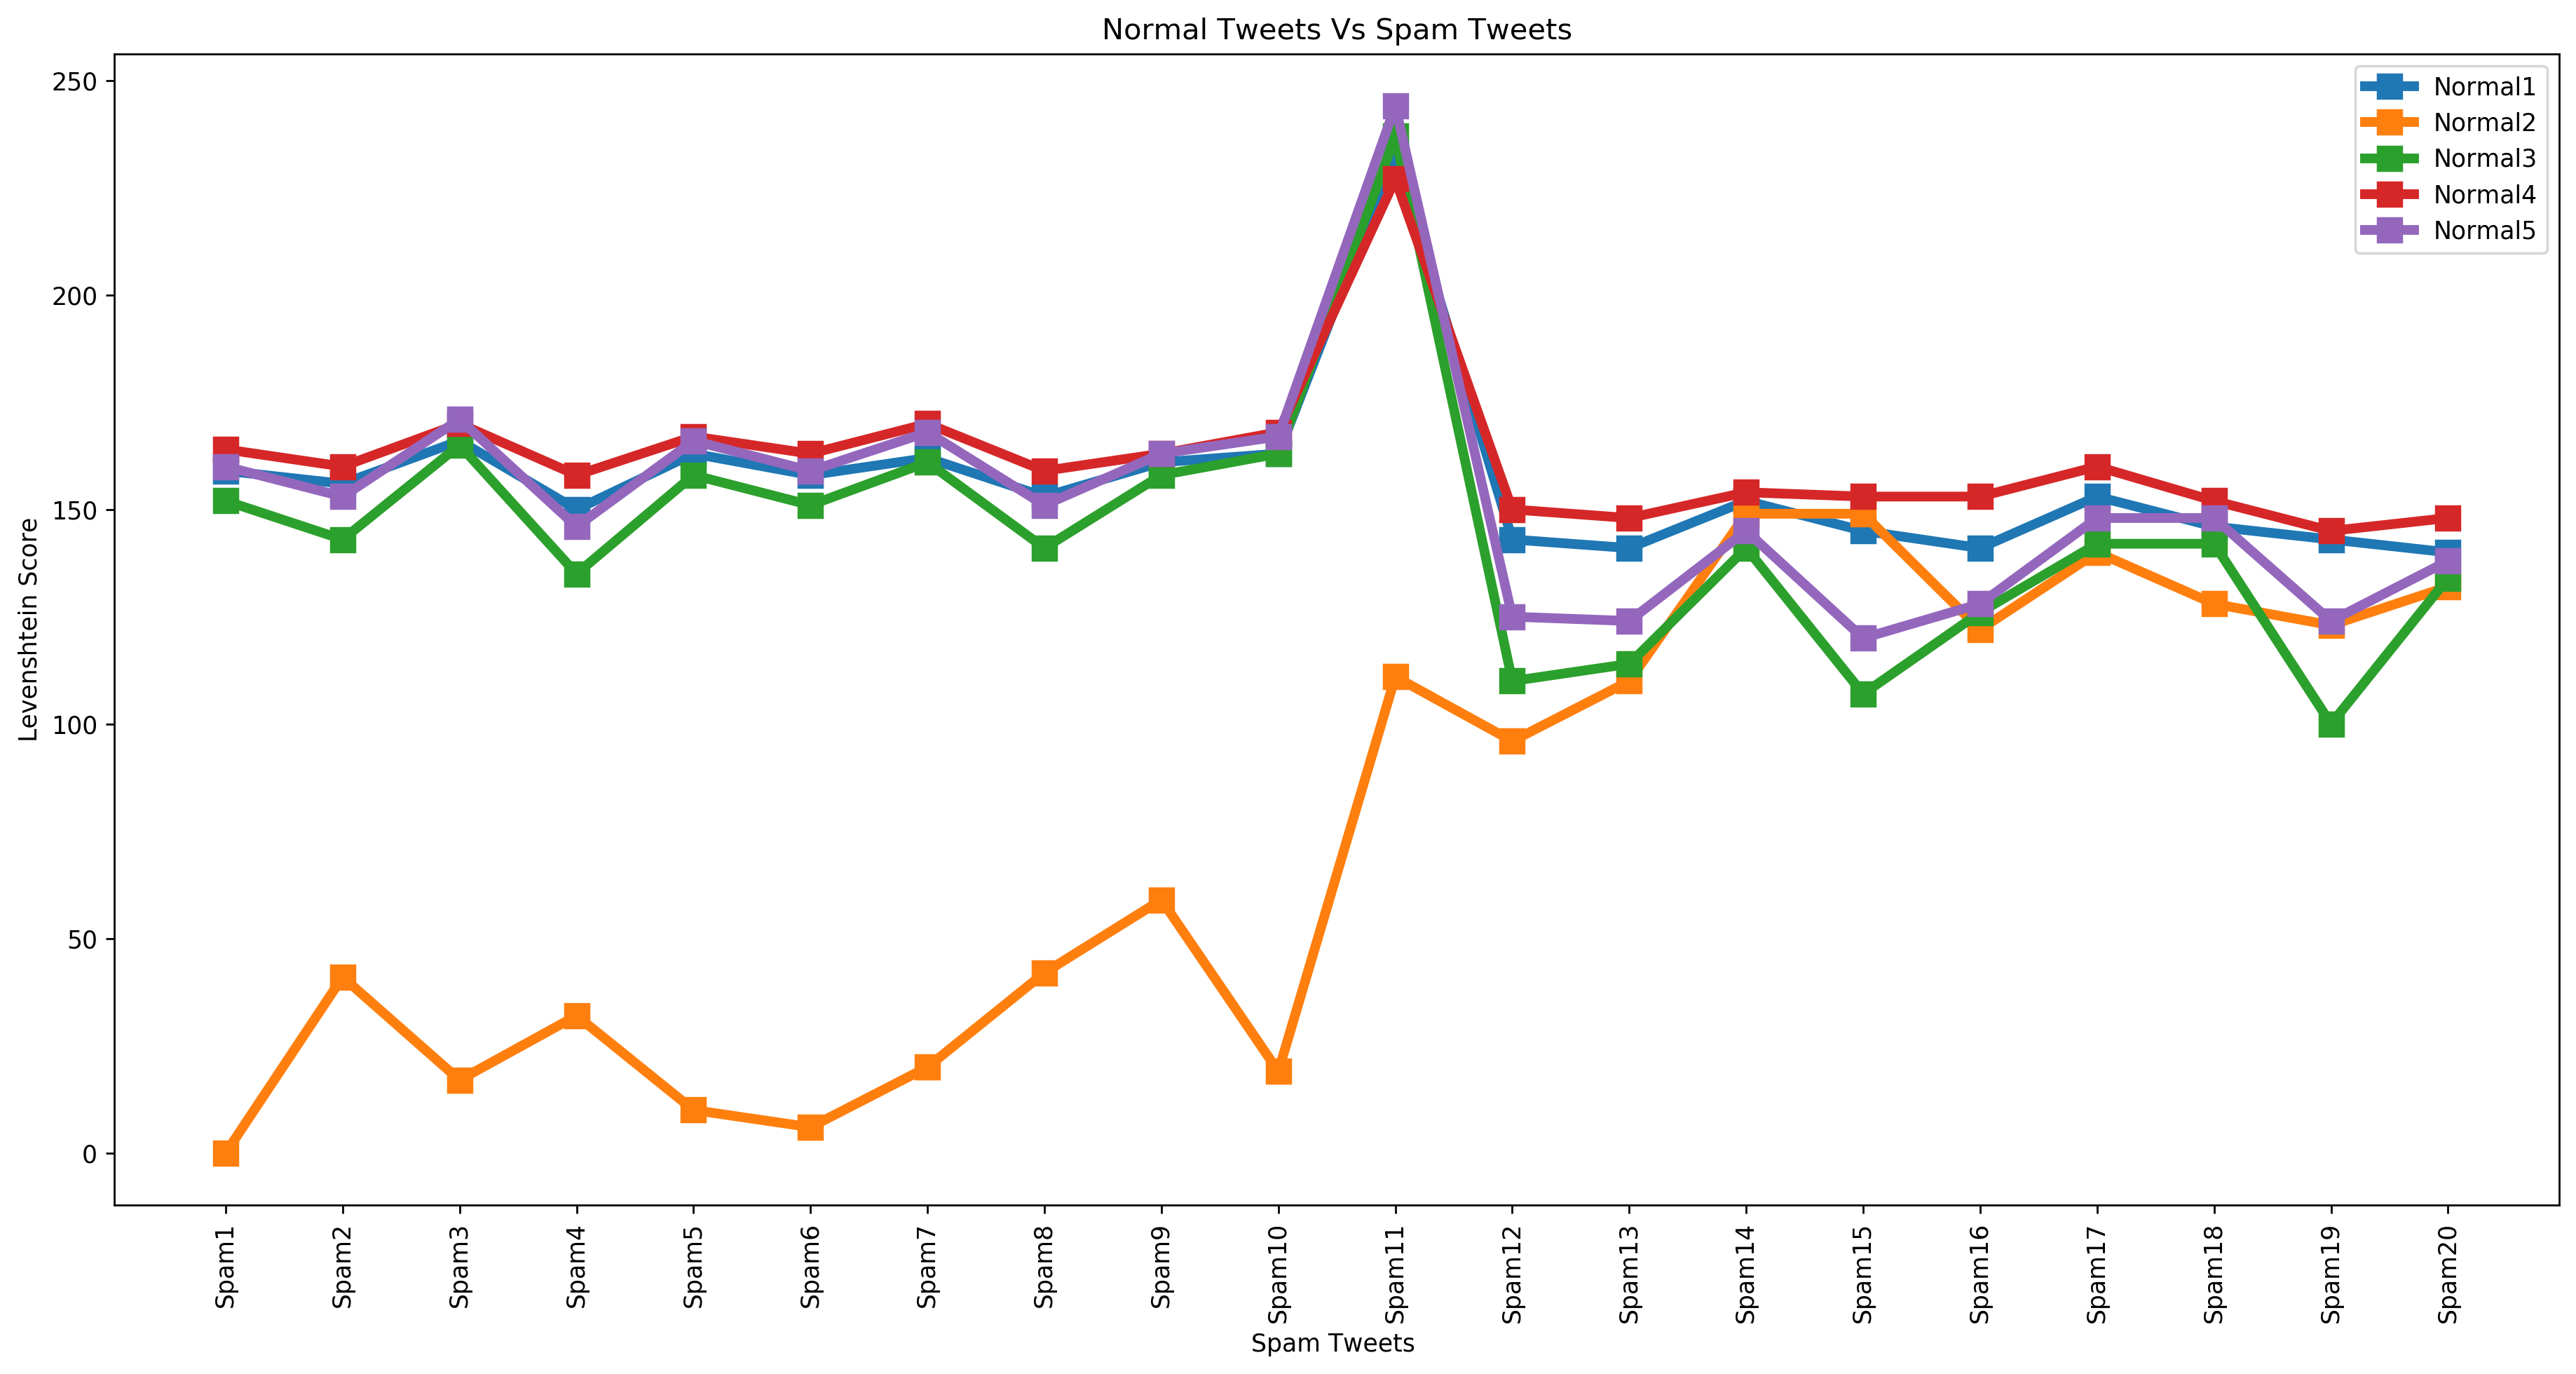

In [31]:
plt.figure(figsize = (18,9),dpi = 250)
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
plt.plot(d_levenshtein,linewidth=4,marker = 's', ms = 10)
plt.title('Normal Tweets Vs Spam Tweets')
plt.xlabel('Spam Tweets ')
plt.ylabel('Levenshtein Score')
plt.xticks(x, spam_lst, rotation='vertical')
plt.legend(normal_lst)
plt.subplots_adjust(bottom=0.15)